In [1]:
!python --version

Python 3.9.2


In [2]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)

In [3]:
conn = sqlite3.connect("../../streamdb.db")

In [4]:
c = conn.cursor()

# Read Lapdata and determine sessionTime of each new Lap

In [5]:
session_name = 'australia_serie_b_r'

In [6]:
sql = f"""SELECT * FROM {session_name}_lapdata"""
c.execute(sql)
data = c.fetchall()
data[:1]

[(1, 0.06918512284755707, 0.0, 0.0, -12.31103515625, -12.31103515625, 2, 1)]

In [7]:
lapdata = pd.DataFrame(data, columns =['id', 'sessionTime', 'lastLapTime', 'currentLapTime', 'lapDistance', 'totalDistance', 'carPosition', 'currentLapNum'])
lapdata.head()

id  sessionTime  lastLapTime  currentLapTime  lapDistance  totalDistance  \
0   1     0.069185          0.0             0.0   -12.311035     -12.311035   
1   2     0.150209          0.0             0.0   -12.311035     -12.311035   
2   3     0.216966          0.0             0.0   -12.311035     -12.311035   
3   4     0.317154          0.0             0.0   -12.311035     -12.311035   
4   5     0.750813          0.0             0.0   -12.311035     -12.311035   

   carPosition  currentLapNum  
0            2              1  
1            2              1  
2            2              1  
3            2              1  
4            2              1

In [8]:
laptimes = lapdata['lastLapTime'].unique()
last_lap = lapdata[lapdata['currentLapNum'] == len(laptimes)]['currentLapTime'].max()
laptimes = np.append(laptimes, last_lap)
laptimes

array([  0.        ,  92.0933609 ,  86.87528229,  89.25193787,
       131.16668701, 144.40411377,  86.97424316,  88.425354  ,
        88.26324463, 110.05401611,  93.54730225,  87.31115723,
        87.12890625,  87.91967773,  87.35986328,  87.19592285,
        87.24108887,  87.75610352,  87.3013916 ,  87.48791504,
        86.95422363,  87.18798828,  86.8494873 ,  87.04394531,
        93.58007812, 117.31811523, 184.359375  ,  93.32470703,
        85.87109375,  88.62963867,  96.94335938,  97.19360352,
       140.78369141,  89.03076172,  86.87646484,  86.01293945,
        86.39306641,  97.03735352, 144.74975586, 123.22314453,
       100.25366211,  91.43530273,  85.49926758,  85.52148438,
        86.015625  ,  85.25048828,  85.11083984,  85.18115234,
        85.68408203,  85.30322266,  85.41552734,  85.41894531,
        86.67138672,  86.07666016,  85.90234375,  86.12255859,
        86.04052734,  86.09716797,  85.66423035])

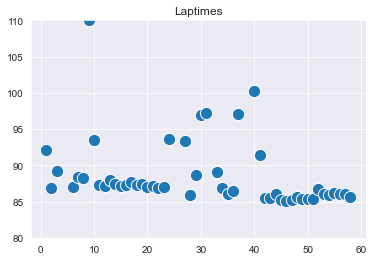

In [9]:
sns.scatterplot(x=range(1, len(laptimes)), y=laptimes[1:], s=150)
plt.ylim(80, 110)
plt.title("Laptimes");
plt.savefig("laptimes.png")

In [10]:
unique_laptimes = lapdata[lapdata['lastLapTime'] > 0]['lastLapTime'].unique()
print("Best Laptime:", np.min(unique_laptimes))
print("Median:", np.median(unique_laptimes))
print("Mean:", np.mean(unique_laptimes))
print("Standard Deviation:", np.std(unique_laptimes))
print("Slowest Laptime:", np.max(unique_laptimes))
sns.boxplot(y=unique_laptimes, showfliers = False)
plt.title("Laptime Distribution w/o outliers")
plt.draw()
plt.savefig("laptimes_boxplot.png")

Best Laptime: 85.11083984375
Median: 87.2410888671875
Mean: 95.08983518366227
Standard Deviation: 19.050154975963817
Slowest Laptime: 184.359375


In [11]:
for i, timing in enumerate(lapdata['lastLapTime'].unique()):
    print(i, timing)

0 0.0
1 92.0933609008789
2 86.87528228759766
3 89.25193786621094
4 131.16668701171875
5 144.40411376953125
6 86.9742431640625
7 88.42535400390625
8 88.26324462890625
9 110.05401611328125
10 93.54730224609375
11 87.3111572265625
12 87.12890625
13 87.919677734375
14 87.35986328125
15 87.1959228515625
16 87.2410888671875
17 87.756103515625
18 87.3013916015625
19 87.4879150390625
20 86.9542236328125
21 87.18798828125
22 86.8494873046875
23 87.0439453125
24 93.580078125
25 117.318115234375
26 184.359375
27 93.32470703125
28 85.87109375
29 88.629638671875
30 96.943359375
31 97.193603515625
32 140.78369140625
33 89.03076171875
34 86.87646484375
35 86.012939453125
36 86.39306640625
37 97.037353515625
38 144.749755859375
39 123.22314453125
40 100.253662109375
41 91.435302734375
42 85.499267578125
43 85.521484375
44 86.015625
45 85.25048828125
46 85.11083984375
47 85.18115234375
48 85.68408203125
49 85.30322265625
50 85.41552734375
51 85.4189453125
52 86.67138671875
53 86.07666015625
54 85.90234

In [12]:
sns.scatterplot(x='lapDistance', y='currentLapTime', hue='currentLapNum', data=lapdata)
plt.title("Laptime and Lap Distance");
plt.savefig("laptimes_lapdistance.png")

In [13]:
plt.figure(figsize=(14,4))
sns.boxplot(x='currentLapNum', y='carPosition', data=lapdata)
plt.ylim(1,20)
plt.title("Car position in course of the race");
plt.savefig("positions.png")

In [14]:
# Determine the sessiontime at every end of a lap
upper_boundaries = [0]
for lap in lapdata['currentLapNum'].unique():
    upper_boundary = lapdata[lapdata['currentLapNum'] == lap]['sessionTime'].max()
    upper_boundaries.append(upper_boundary)
upper_boundaries[:5]

[0,
 143.63075256347656,
 185.5526580810547,
 274.8187561035156,
 405.38946533203125]

# Telemetry Data

In [15]:
sql = f"""SELECT * FROM {session_name}_telemetry"""
c.execute(sql)
data = c.fetchall()
data[:1]

[(1,
  0.4003891348838806,
  0,
  0.15091173350811005,
  -0.006726288236677647,
  0.0,
  1,
  12996.0,
  0,
  28.0,
  28.0,
  28.0,
  28.0,
  58.0,
  58.0,
  61.0,
  61.0,
  68.0,
  68.0,
  75.0,
  75.0,
  83.0)]

In [16]:
column_names = [description[0] for description in c.description]
column_names[:5]

['id', 'sessionTime', 'speed', 'throttle', 'steer']

In [17]:
telemetry = pd.DataFrame(data, columns =column_names)
telemetry.head()

id  sessionTime  speed  throttle     steer  brake  gear  engineRPM  drs  \
0   1     0.400389      0  0.150912 -0.006726    0.0     1    12996.0    0   
1   2     1.568267     16  0.256886 -0.012660    0.0     1     6898.0    0   
2   3     1.785106     22  0.310369 -0.015590    0.0     1     6088.0    0   
3   4     2.585786     45  0.536019 -0.018301    0.0     1     7517.0    0   
4   5     2.802740     52  0.531121 -0.011683    0.0     1     8891.0    0   

   brakesTemperature_RL  brakesTemperature_RR  brakesTemperature_FL  \
0                  28.0                  28.0                  28.0   
1                  28.0                  28.0                  28.0   
2                  28.0                  28.0                  28.0   
3                  28.0                  28.0                  28.0   
4                  28.0                  28.0                  28.0   

   brakesTemperature_FR  tyresSurfaceTemperature_RL  \
0                  28.0                        58.0   
1                  28.0                        74.0   
2                  28.0                        77.0   
3                  28.0                        81.0   
4                  28.0                        83.0   

   tyresSurfaceTemperature_RR  tyresSurfaceTemperature_FL  \
0                        58.0                        61.0   
1                        74.0                        61.0   
2                        77.0                        61.0   
3                        81.0                        61.0   
4                        83.0                        61.0   

   tyresSurfaceTemperature_FR  tyresInnerTemperature_RL  \
0                        61.0                      68.0   
1                        61.0                      68.0   
2                        61.0                      68.0   
3                        61.0                      68.0   
4                        61.0                      68.0   

   tyresInnerTemperature_RR  tyresInnerTemperature_FL  \
0                      68.0                      75.0   
1                      67.0                      75.0   
2                      68.0                      75.0   
3                      68.0                      74.0   
4                      68.0                      74.0   

   tyresInnerTemperature_FR  engineTemperature  
0                      75.0               83.0  
1                      75.0               84.0  
2                      75.0               84.0  
3                      74.0               84.0  
4                      74.0               84.0

In [18]:
intervals = []
for i in range(1, len(upper_boundaries)):
    tup = (upper_boundaries[i-1], upper_boundaries[i])
    intervals.append(tup)
intervals

[(0, 143.63075256347656),
 (143.63075256347656, 185.5526580810547),
 (185.5526580810547, 274.8187561035156),
 (274.8187561035156, 405.38946533203125),
 (405.38946533203125, 550.1914672851562),
 (550.1914672851562, 636.8843994140625),
 (636.8843994140625, 725.2166137695312),
 (725.2166137695312, 813.982421875),
 (813.982421875, 923.3486328125),
 (923.3486328125, 1017.6004028320312),
 (1017.6004028320312, 1104.8466796875),
 (1104.8466796875, 1192.11181640625),
 (1192.11181640625, 1279.75927734375),
 (1279.75927734375, 1367.29345703125),
 (1367.29345703125, 1454.52197265625),
 (1454.52197265625, 1541.8028564453125),
 (1541.8028564453125, 1629.4698486328125),
 (1629.4698486328125, 1714.4871826171875),
 (1714.4871826171875, 1804.257568359375),
 (1804.257568359375, 1890.625732421875),
 (1890.625732421875, 1978.3082275390625),
 (1978.3082275390625, 2064.171875),
 (2064.171875, 2151.7587890625),
 (2151.7587890625, 2245.848388671875),
 (2245.848388671875, 2363.122802734375),
 (2363.122802734375

In [19]:
bins = pd.IntervalIndex.from_tuples(intervals)
laps_intervals = pd.cut(telemetry['sessionTime'], bins)

In [20]:
telemetry['interval'] = laps_intervals
telemetry.head()

id  sessionTime  speed  throttle     steer  brake  gear  engineRPM  drs  \
0   1     0.400389      0  0.150912 -0.006726    0.0     1    12996.0    0   
1   2     1.568267     16  0.256886 -0.012660    0.0     1     6898.0    0   
2   3     1.785106     22  0.310369 -0.015590    0.0     1     6088.0    0   
3   4     2.585786     45  0.536019 -0.018301    0.0     1     7517.0    0   
4   5     2.802740     52  0.531121 -0.011683    0.0     1     8891.0    0   

   brakesTemperature_RL  brakesTemperature_RR  brakesTemperature_FL  \
0                  28.0                  28.0                  28.0   
1                  28.0                  28.0                  28.0   
2                  28.0                  28.0                  28.0   
3                  28.0                  28.0                  28.0   
4                  28.0                  28.0                  28.0   

   brakesTemperature_FR  tyresSurfaceTemperature_RL  \
0                  28.0                        58.0   
1                  28.0                        74.0   
2                  28.0                        77.0   
3                  28.0                        81.0   
4                  28.0                        83.0   

   tyresSurfaceTemperature_RR  tyresSurfaceTemperature_FL  \
0                        58.0                        61.0   
1                        74.0                        61.0   
2                        77.0                        61.0   
3                        81.0                        61.0   
4                        83.0                        61.0   

   tyresSurfaceTemperature_FR  tyresInnerTemperature_RL  \
0                        61.0                      68.0   
1                        61.0                      68.0   
2                        61.0                      68.0   
3                        61.0                      68.0   
4                        61.0                      68.0   

   tyresInnerTemperature_RR  tyresInnerTemperature_FL  \
0                      68.0                      75.0   
1                      67.0                      75.0   
2                      68.0                      75.0   
3                      68.0                      74.0   
4                      68.0                      74.0   

   tyresInnerTemperature_FR  engineTemperature                   interval  
0                      75.0               83.0  (0.0, 143.63075256347656]  
1                      75.0               84.0  (0.0, 143.63075256347656]  
2                      75.0               84.0  (0.0, 143.63075256347656]  
3                      74.0               84.0  (0.0, 143.63075256347656]  
4                      74.0               84.0  (0.0, 143.63075256347656]

In [21]:
telemetry.isnull().sum()[telemetry.isnull().sum() > 0]

Series([], dtype: int64)

In [22]:
telemetry.dropna(subset=['interval'], axis=0, inplace=True)

In [23]:
lapnum = []
for i in range(0, len(telemetry)):
    value = telemetry.iloc[i].interval
    tup = eval(str(value).replace(']', ")"))
    lapn = intervals.index(tup) + 1
    lapnum.append(lapn)

lapnum[:5]

[1, 1, 1, 1, 1]

In [24]:
telemetry['lapNum'] = lapnum
telemetry.head()

id  sessionTime  speed  throttle     steer  brake  gear  engineRPM  drs  \
0   1     0.400389      0  0.150912 -0.006726    0.0     1    12996.0    0   
1   2     1.568267     16  0.256886 -0.012660    0.0     1     6898.0    0   
2   3     1.785106     22  0.310369 -0.015590    0.0     1     6088.0    0   
3   4     2.585786     45  0.536019 -0.018301    0.0     1     7517.0    0   
4   5     2.802740     52  0.531121 -0.011683    0.0     1     8891.0    0   

   brakesTemperature_RL  brakesTemperature_RR  brakesTemperature_FL  \
0                  28.0                  28.0                  28.0   
1                  28.0                  28.0                  28.0   
2                  28.0                  28.0                  28.0   
3                  28.0                  28.0                  28.0   
4                  28.0                  28.0                  28.0   

   brakesTemperature_FR  tyresSurfaceTemperature_RL  \
0                  28.0                        58.0   
1                  28.0                        74.0   
2                  28.0                        77.0   
3                  28.0                        81.0   
4                  28.0                        83.0   

   tyresSurfaceTemperature_RR  tyresSurfaceTemperature_FL  \
0                        58.0                        61.0   
1                        74.0                        61.0   
2                        77.0                        61.0   
3                        81.0                        61.0   
4                        83.0                        61.0   

   tyresSurfaceTemperature_FR  tyresInnerTemperature_RL  \
0                        61.0                      68.0   
1                        61.0                      68.0   
2                        61.0                      68.0   
3                        61.0                      68.0   
4                        61.0                      68.0   

   tyresInnerTemperature_RR  tyresInnerTemperature_FL  \
0                      68.0                      75.0   
1                      67.0                      75.0   
2                      68.0                      75.0   
3                      68.0                      74.0   
4                      68.0                      74.0   

   tyresInnerTemperature_FR  engineTemperature                   interval  \
0                      75.0               83.0  (0.0, 143.63075256347656]   
1                      75.0               84.0  (0.0, 143.63075256347656]   
2                      75.0               84.0  (0.0, 143.63075256347656]   
3                      74.0               84.0  (0.0, 143.63075256347656]   
4                      74.0               84.0  (0.0, 143.63075256347656]   

   lapNum  
0       1  
1       1  
2       1  
3       1  
4       1

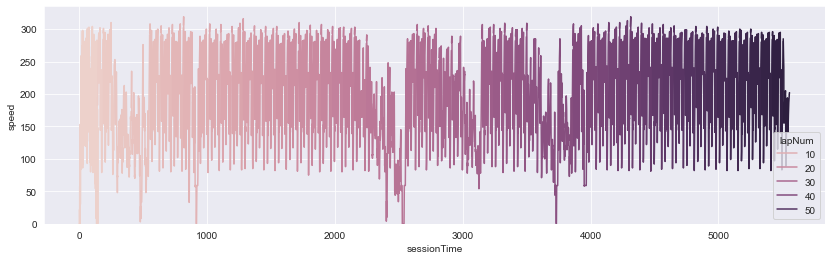

In [25]:
plt.figure(figsize=(14,4))
sns.lineplot(x=telemetry['sessionTime'], y=telemetry['speed'], hue=telemetry['lapNum'])
plt.ylim(0,);

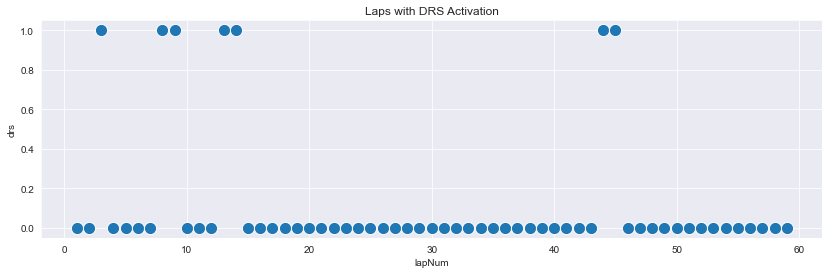

In [26]:
plt.figure(figsize=(14,4))
drs = telemetry.groupby(['lapNum'], as_index=False).max()[['lapNum', 'drs']]
sns.scatterplot(x='lapNum', y='drs', data=drs, s=150)
plt.title("Laps with DRS Activation");
plt.savefig("drs_activations.png")

In [27]:
for j, i in enumerate(intervals):
    print(f"Lap {j+1}: {i[0]}")

Lap 1: 0
Lap 2: 143.63075256347656
Lap 3: 185.5526580810547
Lap 4: 274.8187561035156
Lap 5: 405.38946533203125
Lap 6: 550.1914672851562
Lap 7: 636.8843994140625
Lap 8: 725.2166137695312
Lap 9: 813.982421875
Lap 10: 923.3486328125
Lap 11: 1017.6004028320312
Lap 12: 1104.8466796875
Lap 13: 1192.11181640625
Lap 14: 1279.75927734375
Lap 15: 1367.29345703125
Lap 16: 1454.52197265625
Lap 17: 1541.8028564453125
Lap 18: 1629.4698486328125
Lap 19: 1714.4871826171875
Lap 20: 1804.257568359375
Lap 21: 1890.625732421875
Lap 22: 1978.3082275390625
Lap 23: 2064.171875
Lap 24: 2151.7587890625
Lap 25: 2245.848388671875
Lap 26: 2363.122802734375
Lap 27: 2547.413818359375
Lap 28: 2640.658203125
Lap 29: 2726.435546875
Lap 30: 2814.481689453125
Lap 31: 2911.570556640625
Lap 32: 3008.8037109375
Lap 33: 3149.062744140625
Lap 34: 3238.568359375
Lap 35: 3325.369873046875
Lap 36: 3411.607177734375
Lap 37: 3497.77197265625
Lap 38: 3594.677978515625
Lap 39: 3739.673828125
Lap 40: 3860.6767578125
Lap 41: 3962.871

# Compare two laps

In [32]:
lap1 = 15
lap2 = 20
excerpt1 = telemetry[telemetry['lapNum'] == lap1].copy()
excerpt2 = telemetry[telemetry['lapNum'] == lap2].copy()
excerpt1['normalizedTime'] = excerpt1['sessionTime'] - intervals[lap1-1][0]
excerpt2['normalizedTime'] = excerpt2['sessionTime'] - intervals[lap2-1][0]

In [33]:
compare_df = excerpt1.append(excerpt2)

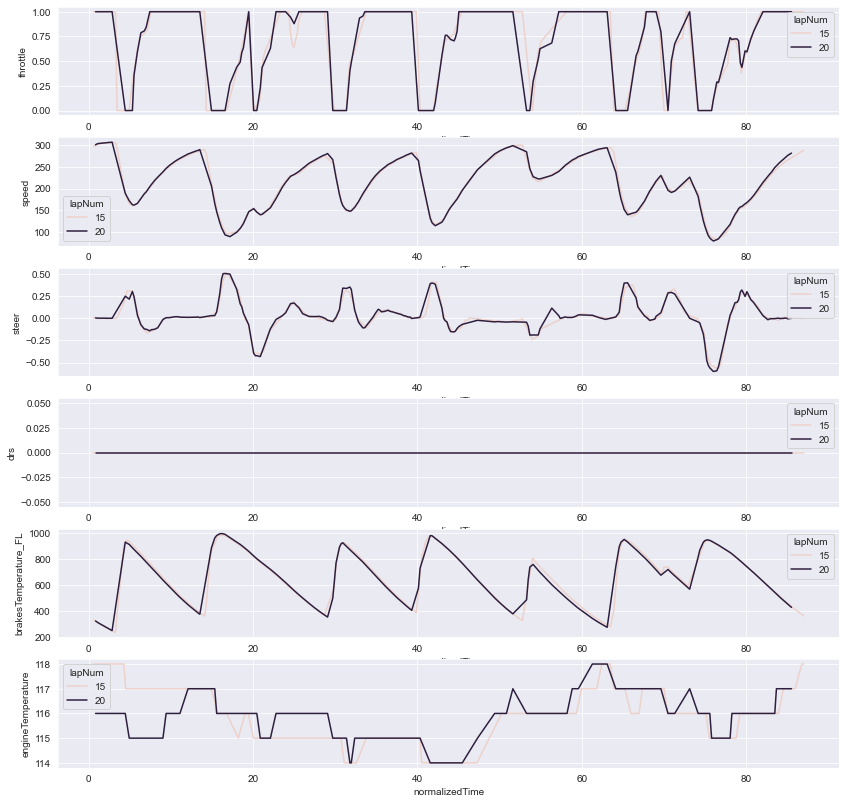

In [34]:
plt.figure(figsize=(14,14))
plt.subplot(6,1,1)
sns.lineplot(x='normalizedTime', y='throttle', hue='lapNum', data=compare_df)
plt.subplot(6,1,2)
sns.lineplot(x='normalizedTime', y='speed', hue='lapNum', data=compare_df)
plt.subplot(6,1,3)
sns.lineplot(x='normalizedTime', y='steer', hue='lapNum', data=compare_df)
plt.subplot(6,1,4)
sns.lineplot(x='normalizedTime', y='drs', hue='lapNum', data=compare_df)
plt.subplot(6,1,5)
sns.lineplot(x='normalizedTime', y='brakesTemperature_FL', hue='lapNum', data=compare_df)
plt.subplot(6,1,6)
sns.lineplot(x='normalizedTime', y='engineTemperature', hue='lapNum', data=compare_df);
plt.savefig("telemetry_analysis.png")

In [31]:
conn.close()